In [703]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [704]:
df=pd.read_csv("Manhattan12.csv")
df.head()

,Manhattan Rolling Sales File. All Sales From August 2012 - August 2013.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013


In [705]:
pd.set_option('display.max_columns', None)

### Data Pre-processing

## 1 Shape of the df

In [706]:
df.shape

(27399, 21)

In [707]:
df.iloc[:,19]

0                NaN
1                NaN
2                NaN
3        SALE\nPRICE
4         $2,214,693
            ...     
27394             $0
27395       $495,000
27396             $0
27397             $0
27398             $0
Name: Unnamed: 19, Length: 27399, dtype: object

##  cleaning columns

In [708]:

cols=df.iloc[3, :]  # Select the 3rd row

In [709]:
cols

Manhattan Rolling Sales File.  All Sales From August 2012 - August 2013.                            BOROUGH
Unnamed: 1                                                                                     NEIGHBORHOOD
Unnamed: 2                                                                          BUILDING CLASS CATEGORY
Unnamed: 3                                                                             TAX CLASS AT PRESENT
Unnamed: 4                                                                                            BLOCK
Unnamed: 5                                                                                              LOT
Unnamed: 6                                                                                        EASE-MENT
Unnamed: 7                                                                        BUILDING CLASS AT PRESENT
Unnamed: 8                                                                                          ADDRESS
Unnamed: 9                  

In [710]:
def remove_new_line(cols):
    new_cols=[]
    for col in cols:
        new_cols.append(col.replace("\n"," "))
    
    return new_cols
cols=remove_new_line(cols)
cols[9]='APARTMENT NUMBER'
cols

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'TAX CLASS AT PRESENT',
 'BLOCK',
 'LOT',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'BUILDING CLASS AT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE']

In [711]:
len(cols)

21

In [712]:
duplicate_cols=df.columns
duplicate_cols

Index(['Manhattan Rolling Sales File.  All Sales From August 2012 - August 2013. ',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20'],
      dtype='object')

In [713]:
df.columns=cols
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [714]:
df.head()


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APART\nMENT\nNUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE\nPRICE,SALE DATE
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013


In [715]:
df=pd.DataFrame(df.drop(3,axis=0))
df.head() # removed the original column from df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
5,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013


In [716]:
df=df.reset_index(drop=True) #reseting the index

In [717]:
df.columns=cols #Assigning new cols to df
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1306,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$2,214,693",20/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013


In [718]:
redundant_info=df.iloc[0:3]
redundant_info

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Sales File as of 08/30/2013 Coop Sales Files ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Neighborhood Name 09/06/13, Descriptive Data i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Building Class Category is based on Building C...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [719]:

df=df.drop(index=[0,1,2,3])
df=df.reset_index(drop=True)


In [720]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1311,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,705,568",21/05/2013


In [721]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1307,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,654,656",16/05/2013
1,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1308,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,069,162",23/05/2013
2,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1309,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,374,637",15/05/2013
3,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1310,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,649,565",13/05/2013
4,1,,13 CONDOS - ELEVATOR APARTMENTS,,738,1311,,,345 WEST 14TH STREET,,10014,0,0,0,0,0,0,2,R4,"$1,705,568",21/05/2013


In [722]:
def change_SALE_PRICE(ele):
    try:
        ele=ele.replace("$","").replace(",","")
        ele=int(ele)
        return ele
    except AttributeError:
        return ele

In [776]:
df["SALE PRICE"]=df["SALE PRICE"].apply(change_SALE_PRICE)
cols_to_change=["RESIDENTIAL UNITS","TOTAL UNITS","LAND SQUARE FEET"]
for col in cols_to_change:
    df[col]=df[col].apply(change_SALE_PRICE)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10856\3865466044.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SALE PRICE"]=df["SALE PRICE"].apply(change_SALE_PRICE)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_10856\3865466044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].apply(change_SALE_PRICE)


In [724]:
df["SALE PRICE"].head()

0    1654656
1    1069162
2    1374637
3    1649565
4    1705568
Name: SALE PRICE, dtype: int64

In [777]:
df[cols_to_change].tail(10)

,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET
27012,45.0,46.0,12125.0
27013,50.0,51.0,12125.0
27018,26.0,31.0,6800.0
27019,20.0,22.0,5292.0
27051,68.0,74.0,15800.0
27056,56.0,57.0,14150.0
27058,69.0,74.0,12400.0
27059,68.0,71.0,14231.0
27063,50.0,52.0,12050.0
27066,25.0,27.0,5000.0


In [726]:
df.isnull().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [727]:
df.isna().any()

BOROUGH                           False
NEIGHBORHOOD                      False
BUILDING CLASS CATEGORY           False
TAX CLASS AT PRESENT              False
BLOCK                             False
LOT                               False
EASE-MENT                         False
BUILDING CLASS AT PRESENT         False
ADDRESS                           False
APARTMENT NUMBER                  False
ZIP CODE                          False
RESIDENTIAL UNITS                 False
COMMERCIAL UNITS                  False
TOTAL UNITS                       False
LAND SQUARE FEET                  False
GROSS SQUARE FEET                 False
YEAR BUILT                        False
TAX CLASS AT TIME OF SALE         False
BUILDING CLASS AT TIME OF SALE    False
SALE PRICE                        False
SALE DATE                         False
dtype: bool

In [728]:
df["SALE PRICE"].dtype

dtype('int64')

In [729]:
def is_num(num):
    try:
        if(float(num)):
            return True
    except err:
        return False


def convert_float_to_int(df):
    for col in df.columns:
        if pd.api.types.is_float_dtype(df[col]):
            df[col] = df[col].astype(int)
    return df


In [730]:
def separate_cols(df):
    num_cols=[]
    categorical_cols=[]
    for col in df.columns:
        if(df[col].dtype==int ):
            num_cols.append(col)
        else:
            categorical_cols.append(col)
    return num_cols,categorical_cols

In [731]:
def conv_to_numeric(df: pd.DataFrame):
    for col in df.columns:
        try:
            df[col] = df[col].astype(int)
        except Exception as err:
            continue
    

df=conv_to_numeric(df)
df

In [732]:
conv_to_numeric(df)

In [733]:
num_cols,categorical_cols=separate_cols(df)

In [734]:
num_cols,categorical_cols

(['BOROUGH',
  'BLOCK',
  'LOT',
  'ZIP CODE',
  'RESIDENTIAL UNITS',
  'COMMERCIAL UNITS',
  'TOTAL UNITS',
  'LAND SQUARE FEET',
  'YEAR BUILT',
  'TAX CLASS AT TIME OF SALE',
  'SALE PRICE'],
 ['NEIGHBORHOOD',
  'BUILDING CLASS CATEGORY',
  'TAX CLASS AT PRESENT',
  'EASE-MENT',
  'BUILDING CLASS AT PRESENT',
  'ADDRESS',
  'APARTMENT NUMBER',
  'GROSS SQUARE FEET',
  'BUILDING CLASS AT TIME OF SALE',
  'SALE DATE'])

In [735]:
def get_empty_cols(df:pd.DataFrame):
    empty_categorical_cols=[]
    for col in df.columns:
        if((df[col]=="").any()):
            empty_categorical_cols.append(col)
    return empty_categorical_cols

In [736]:
get_empty_cols(df)

[]

In [737]:
redundant_info.BOROUGH[0]


'Sales File as of 08/30/2013  Coop Sales Files as of 09/18/2013'

### converting SALE DATE data type

In [738]:
from datetime import datetime
def conv_date_time(ele):
    format="%d/%m/%Y"
    ele=datetime.strptime(ele,format)
    return ele

In [739]:
df["SALE DATE"]=df["SALE DATE"].apply(conv_date_time)

In [740]:
df.head()
categorical_cols.remove('SALE DATE')


In [741]:
def is_empty(ele):
    if (ele==""): 
        return True
    else:
        return False
    

def find_empty_str(df:pd.DataFrame,categorical_cols):
    for col in categorical_cols:
        df[col]=np.where(df[col].str.len()==0,np.nan,df[col])

In [742]:
find_empty_str(df,categorical_cols)

In [743]:
for col in categorical_cols:
    if((df[col].str.len()==0).any()):
        print(col) #there are no empty strings

In [744]:
len(num_cols)

11

In [745]:
df[categorical_cols] ##there

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE
0,,13 CONDOS - ELEVATOR APARTMENTS,,,,345 WEST 14TH STREET,,0,R4
1,,13 CONDOS - ELEVATOR APARTMENTS,,,,345 WEST 14TH STREET,,0,R4
2,,13 CONDOS - ELEVATOR APARTMENTS,,,,345 WEST 14TH STREET,,0,R4
3,,13 CONDOS - ELEVATOR APARTMENTS,,,,345 WEST 14TH STREET,,0,R4
4,,13 CONDOS - ELEVATOR APARTMENTS,,,,345 WEST 14TH STREET,,0,R4
...,...,...,...,...,...,...,...,...,...
27389,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,,V1,44 FAIRVIEW AVENUE,,0,V1
27390,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,,V1,BENNETT AVENUE,,0,V1
27391,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,,V1,BENNETT AVENUE,,0,V1
27392,WASHINGTON HEIGHTS UPPER,31 COMMERCIAL VACANT LAND,4,,V1,N/A MAGAW PLACE,,0,V1


### replacing zeroes in numerical cols

In [746]:
def replace_zeroes(df:pd.DataFrame,num_cols):
    for col in num_cols:
        df[col]=np.where(df[col]==0,np.nan,df[col])

In [747]:
replace_zeroes(df,num_cols)

In [748]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1.0,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1307.0,,,345 WEST 14TH STREET,,10014.0,NaN,NaN,NaN,NaN,0,NaN,2.0,R4,1654656.0,2013-05-16
1,1.0,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1308.0,,,345 WEST 14TH STREET,,10014.0,NaN,NaN,NaN,NaN,0,NaN,2.0,R4,1069162.0,2013-05-23
2,1.0,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1309.0,,,345 WEST 14TH STREET,,10014.0,NaN,NaN,NaN,NaN,0,NaN,2.0,R4,1374637.0,2013-05-15
3,1.0,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1310.0,,,345 WEST 14TH STREET,,10014.0,NaN,NaN,NaN,NaN,0,NaN,2.0,R4,1649565.0,2013-05-13
4,1.0,,13 CONDOS - ELEVATOR APARTMENTS,,738.0,1311.0,,,345 WEST 14TH STREET,,10014.0,NaN,NaN,NaN,NaN,0,NaN,2.0,R4,1705568.0,2013-05-21


In [778]:
df=convert_float_to_int(df)
len(df.columns),df.shape

C:\Users\dhanu\AppData\Local\Temp\ipykernel_10856\725821537.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(int)


(18, (371, 18))

In [750]:
df.isna().sum() #summary of missing values

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              1
RESIDENTIAL UNITS                 16371
COMMERCIAL UNITS                  23961
TOTAL UNITS                        9703
LAND SQUARE FEET                  22905
GROSS SQUARE FEET                     0
YEAR BUILT                         6440
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                         7593
SALE DATE                             0
dtype: int64

### statistical summary of df

In [751]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,27394.0,27394.000000,27394.000000,27393.000000,11023.000000,3433.000000,17691.000000,4489.000000,20954.000000,27394.000000,1.980100e+04
mean,1.0,1109.680295,741.768489,10029.226773,4.390003,2.992426,3.545249,5893.466028,1953.080557,2.488136,2.556627e+06
std,0.0,465.997564,819.430289,34.967501,23.260831,12.689861,19.482767,7884.729624,37.692641,0.891734,1.916343e+07
min,1.0,7.000000,1.000000,10001.000000,1.000000,1.000000,1.000000,200.000000,1000.000000,1.000000,1.000000e+00
25%,1.0,877.000000,37.000000,10016.000000,1.000000,1.000000,1.000000,2104.000000,1920.000000,2.000000,3.675550e+05
50%,1.0,1047.000000,1007.000000,10019.000000,1.000000,2.000000,1.000000,5046.000000,1955.000000,2.000000,7.400000e+05
75%,1.0,1411.000000,1233.000000,10027.000000,1.000000,2.000000,1.000000,7532.000000,1987.000000,4.000000,1.626000e+06
max,1.0,2250.000000,9117.000000,10463.000000,1328.000000,604.000000,1349.000000,213650.000000,2013.000000,4.000000,1.307965e+09


In [752]:
drop_cols=['BOROUGH', 'EASE-MENT', 'APARTMENT NUMBER']

In [753]:

df=df.drop(columns=drop_cols)

In [754]:
df.shape

(27394, 18)

## dropping duplicate cols

In [755]:
df=df.drop_duplicates()

In [756]:
df.shape

(25801, 18)

## dropping NaN rows

In [757]:
df=df.dropna()

In [758]:
df.shape

(470, 18)

## Removing outliers

<Axes: xlabel='YEAR BUILT'>

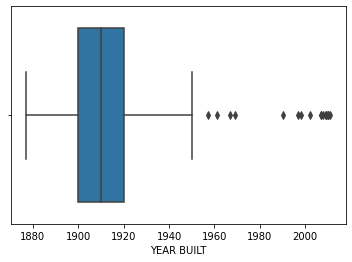

In [759]:
sns.boxplot(data=df, x="YEAR BUILT")

In [760]:
len(num_cols)

11

In [761]:
df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
23,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,385,1,C7,17 AVENUE B,10009.0,7.0,1.0,8.0,2093.0,"5,852",1997.0,2.0,C7,283.0,2013-04-18
25,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,397,33,C7,14 AVENUE B,10009.0,25.0,2.0,27.0,3574.0,"18,212",1925.0,2.0,C7,13185684.0,2013-01-31
29,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,398,53,C7,170 EAST 2ND STREET,10009.0,36.0,3.0,39.0,4452.0,"17,664",1900.0,2.0,C7,3810602.0,2012-10-26
30,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,56,C4,203 EAST 4TH STREET,10009.0,10.0,1.0,10.0,2404.0,"6,975",1900.0,2.0,C4,7333333.0,2013-04-09
31,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,57,C4,201 EAST 4TH STREET,10009.0,9.0,1.0,9.0,2404.0,"6,875",1900.0,2.0,C4,7333333.0,2013-04-09


<Axes: >

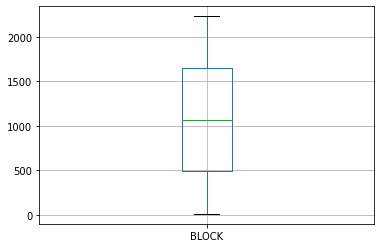

In [762]:
df.boxplot(column=num_cols[1])


<Axes: >

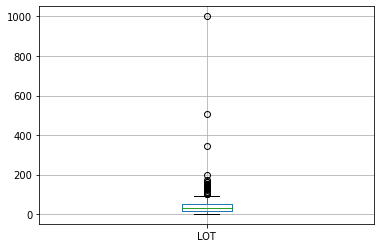

In [763]:
df.boxplot(column=num_cols[2])

<Axes: >

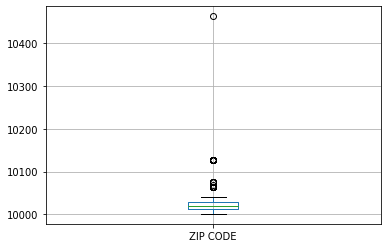

In [764]:
df.boxplot(column=num_cols[3])

<Axes: >

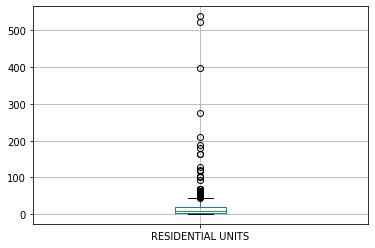

In [765]:
df.boxplot(column=num_cols[4])

<Axes: >

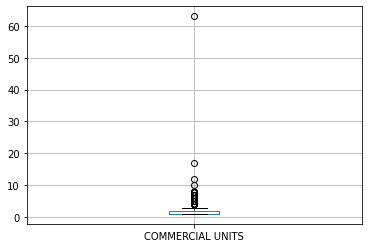

In [766]:
df.boxplot(column=num_cols[5])

<Axes: >

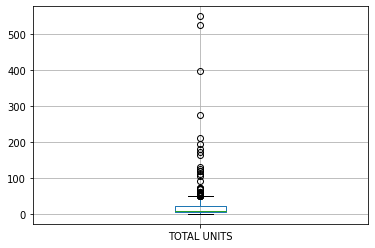

In [767]:
df.boxplot(column=num_cols[6])

<Axes: >

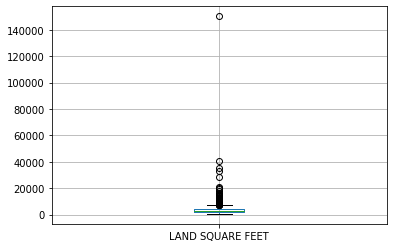

In [768]:
df.boxplot(column=num_cols[7])

<Axes: >

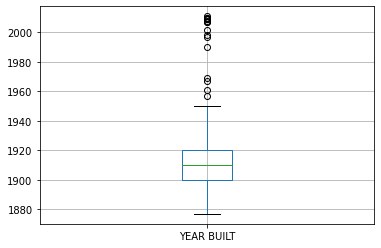

In [769]:
df.boxplot(column=num_cols[8])

<Axes: >

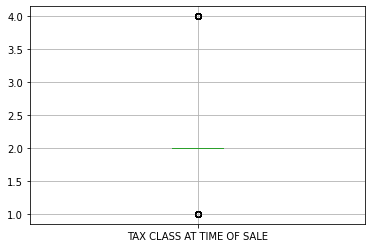

In [770]:
df.boxplot(column=num_cols[9])

In [771]:
def remove_outlier(df,col):
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    df= df[~((df[col]<(Q1-1.5*IQR)) | (df[col]>(Q3+1.5*IQR)))]
    return df

In [784]:
num_cols,categorical_cols=separate_cols(df)

In [785]:
for col in num_cols:
    try:
        
        df=remove_outlier(df,col)
    except TypeError:
        
        print(col)

In [786]:
df=remove_outlier(df,num_cols[9])

In [787]:

num_cols,categorical_cols=separate_cols(df)

<Axes: >

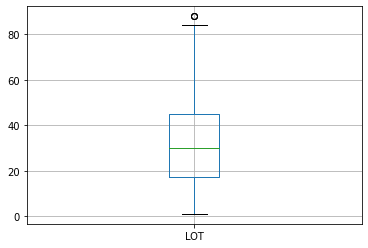

In [788]:
df.boxplot(column=num_cols[1])


{'whiskers': [<matplotlib.lines.Line2D at 0x2015efa04c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2015efa05e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2015efa2650>],
 'medians': [<matplotlib.lines.Line2D at 0x2015ef6eb30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2015ef6e200>],
 'means': []}

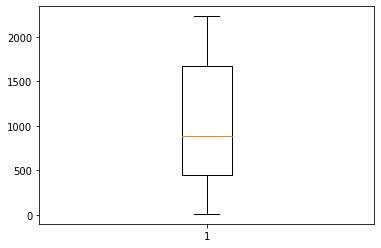

In [789]:
plt.boxplot(df[num_cols[0]])

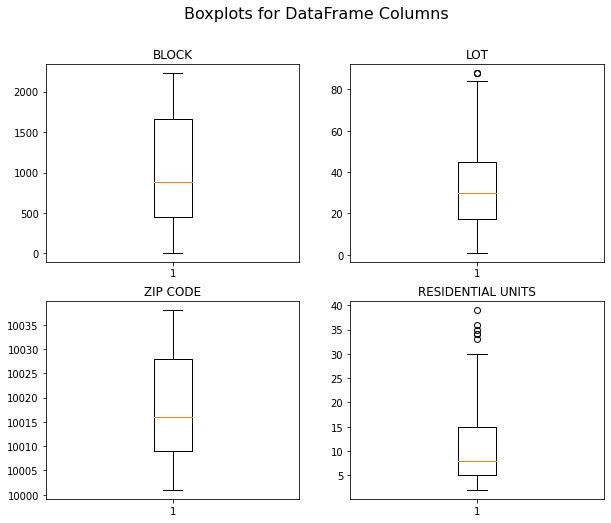

In [790]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0, 0].boxplot(df[num_cols[0]])
axes[0, 0].set_title(num_cols[0])

axes[0, 1].boxplot(df[num_cols[1]])
axes[0, 1].set_title(num_cols[1])

axes[1, 0].boxplot(df[num_cols[2]])
axes[1, 0].set_title(num_cols[2])

axes[1, 1].boxplot(df[num_cols[3]])
axes[1, 1].set_title(num_cols[3])
fig.suptitle('Boxplots for DataFrame Columns', fontsize=16)


plt.show()


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

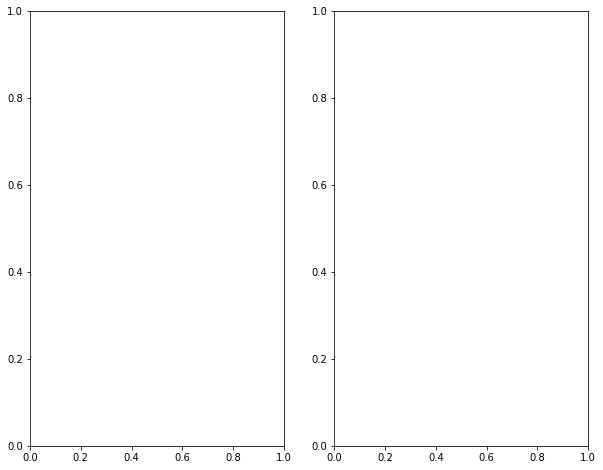

In [791]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
axes[0, 0].boxplot(df[num_cols[4]])
axes[0, 0].set_title(num_cols[4])

axes[0, 1].boxplot(df[num_cols[5]])
axes[0, 1].set_title(num_cols[5])

axes[1, 0].boxplot(df[num_cols[6]])
axes[1, 0].set_title(num_cols[6])

axes[1, 1].boxplot(df[num_cols[7]])
axes[1, 1].set_title(num_cols[7])
fig.suptitle('Boxplots for DataFrame Columns', fontsize=16)


plt.show()


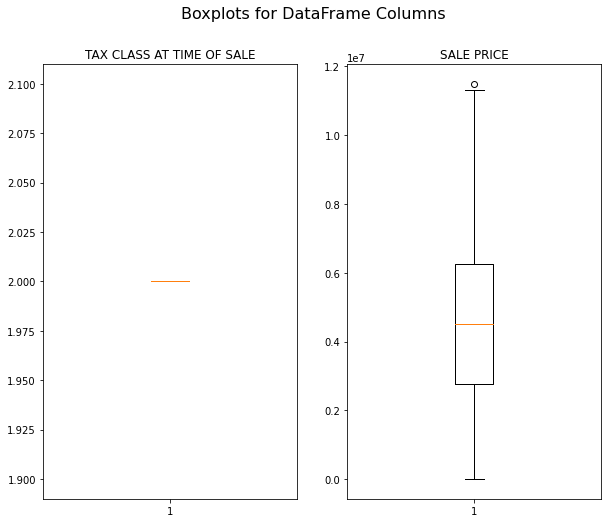

In [792]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))

axes[0].boxplot(df[num_cols[8]])
axes[0].set_title(num_cols[8])

axes[1].boxplot(df[num_cols[9]])
axes[1].set_title(num_cols[9])

fig.suptitle('Boxplots for DataFrame Columns', fontsize=16)


plt.show()



## shape of the DF after removing outliers

In [793]:
num_cols,categorical_cols=separate_cols(df)

In [794]:
num_cols

['BLOCK',
 'LOT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'SALE PRICE']

In [795]:
df.shape

(210, 18)

In [796]:
df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
29,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,398,53,C7,170 EAST 2ND STREET,10009,36,3,39,4452,"17,664",1900,2,C7,3810602,2012-10-26
30,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,56,C4,203 EAST 4TH STREET,10009,10,1,10,2404,"6,975",1900,2,C4,7333333,2013-04-09
31,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,57,C4,201 EAST 4TH STREET,10009,9,1,9,2404,"6,875",1900,2,C4,7333333,2013-04-09
32,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,58,C4,199 EAST 4TH STREET,10009,9,1,10,2404,"7,110",1900,2,C4,7333333,2013-04-09
33,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,400,60,C4,195 EAST FOURTH STREET,10009,18,2,18,2404,"8,975",1913,2,C4,7000000,2013-04-09


In [797]:
df["SALE PRICE"]=np.log(df["SALE PRICE"])

In [798]:
df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
29,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,398,53,C7,170 EAST 2ND STREET,10009,36,3,39,4452,"17,664",1900,2,C7,15.153298,2012-10-26
30,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,56,C4,203 EAST 4TH STREET,10009,10,1,10,2404,"6,975",1900,2,C4,15.807941,2013-04-09
31,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,57,C4,201 EAST 4TH STREET,10009,9,1,9,2404,"6,875",1900,2,C4,15.807941,2013-04-09
32,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,400,58,C4,199 EAST 4TH STREET,10009,9,1,10,2404,"7,110",1900,2,C4,15.807941,2013-04-09
33,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,400,60,C4,195 EAST FOURTH STREET,10009,18,2,18,2404,"8,975",1913,2,C4,15.761421,2013-04-09


## normalising dataset

In [799]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler=StandardScaler()
le=LabelEncoder()

In [800]:
for col in categorical_cols:
    df[col]=le.fit_transform(df[col])
    

In [693]:
df.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
30,0,0,2,400,56,1,66,10009,10,1,10,2404,98,1900,2,1,15.807941,71
31,0,0,2,400,57,1,61,10009,9,1,9,2404,96,1900,2,1,15.807941,71
32,0,0,2,400,58,1,56,10009,9,1,10,2404,106,1900,2,1,15.807941,71
33,0,0,0,400,60,1,55,10009,18,2,18,2404,147,1913,2,1,15.761421,71
44,0,1,0,404,48,4,118,10009,12,1,12,2369,157,1920,2,4,16.077274,81


In [835]:
# num_cols.remove("TAX CLASS AT TIME OF SALE")
df=df.drop(columns="TAX CLASS AT TIME OF SALE")


In [836]:
X=pd.DataFrame(scaler.fit_transform(df))

In [837]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.52904,-0.805047,-1.077611,-1.006613,1.089075,-0.718455,-0.778214,-0.80292,3.325129,2.422719,3.410446,2.192975,-0.927336,-1.092222,-0.725996,0.141308,-0.822938
1,-1.52904,-0.805047,1.243398,-1.003420,1.244059,-1.187742,-0.403347,-0.80292,-0.099735,-0.807573,-0.284558,-0.024532,0.474186,-1.092222,-1.194381,0.476416,0.675936
2,-1.52904,-0.805047,1.243398,-1.003420,1.295721,-1.187742,-0.488544,-0.80292,-0.231461,-0.807573,-0.411972,-0.024532,0.438704,-1.092222,-1.194381,0.476416,0.675936
3,-1.52904,-0.805047,1.243398,-1.003420,1.347383,-1.187742,-0.590781,-0.80292,-0.231461,-0.807573,-0.284558,-0.024532,0.616112,-1.092222,-1.194381,0.476416,0.675936
4,-1.52904,-0.805047,-1.077611,-1.003420,1.450706,-1.187742,-0.607820,-0.80292,0.954069,0.807573,0.734754,-0.024532,1.343484,0.263742,-1.194381,0.452602,0.675936


## Visualising Data

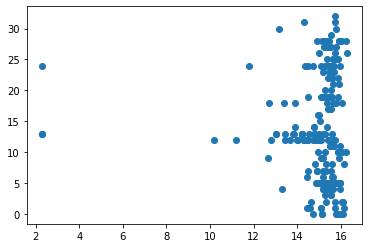

In [838]:
plt.scatter(x=df["SALE PRICE"],y=df["NEIGHBORHOOD"])

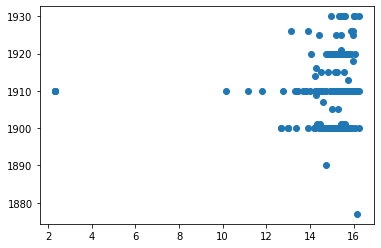

In [839]:
plt.scatter(x=df["SALE PRICE"],y=df["YEAR BUILT"])

C:\Users\dhanu\.conda\envs\My_ML\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


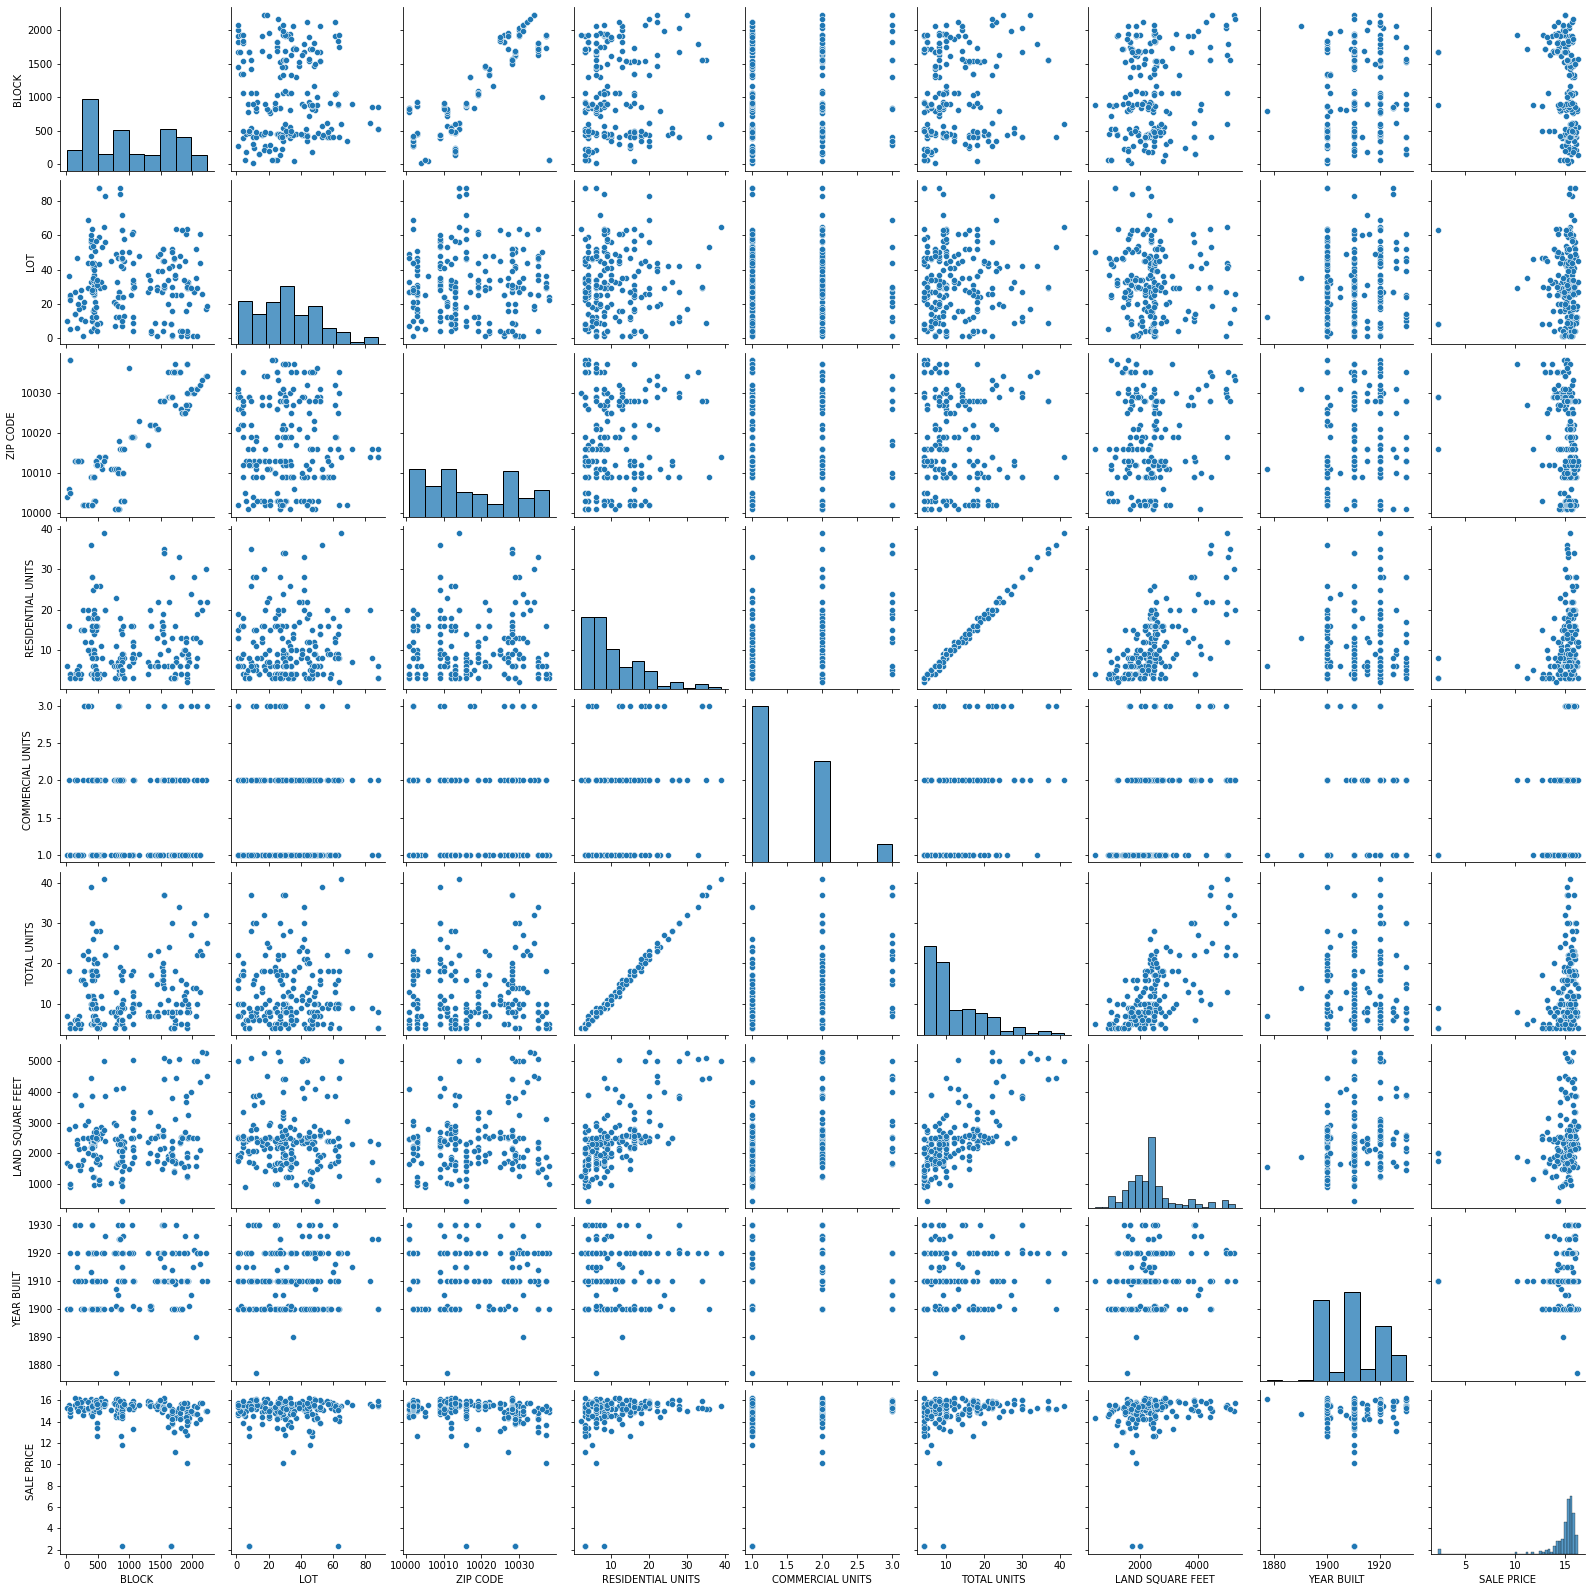

In [840]:
sns.pairplot(df[num_cols])
plt.show()

In [841]:
corr=df[num_cols].corr()

Text(0.5, 1.0, 'Correlation matrix heatmap')

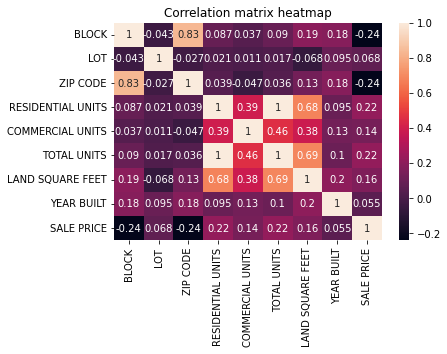

In [842]:
sns.heatmap(corr,annot=True)
plt.title("Correlation matrix heatmap")

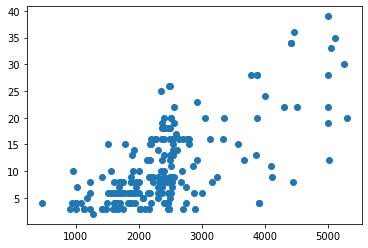

In [844]:
plt.scatter(x=df["LAND SQUARE FEET"],y=df["RESIDENTIAL UNITS"])

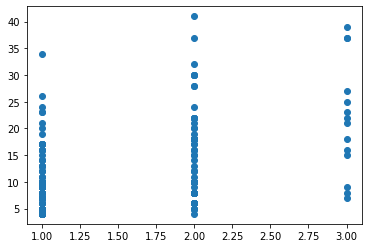

In [847]:
plt.scatter(x=df["COMMERCIAL UNITS"],y=df["TOTAL UNITS"])

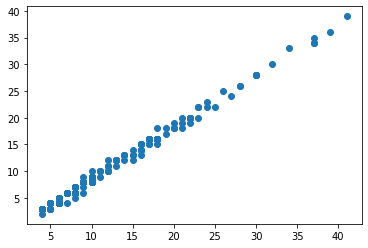

In [846]:
plt.scatter(x=df["TOTAL UNITS"],y=df["RESIDENTIAL UNITS"])

<Axes: >

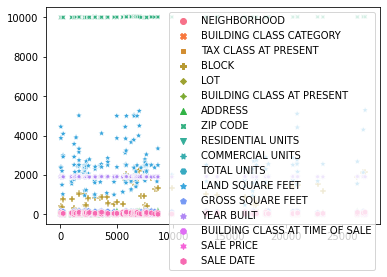

In [989]:
sns.scatterplot(df)

In [977]:
cols_to_drop=["BLOCK","ZIP CODE","RESIDENTIAL UNITS","TOTAL UNITS","COMMERCIAL UNITS","YEAR BUILT"]

In [978]:
df.corr()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
NEIGHBORHOOD,1.000000,-0.028323,-0.079150,0.375477,0.139549,-0.006441,0.039470,0.379189,0.069169,-0.051233,0.067502,-0.002916,-0.089305,0.273676,-0.007983,-0.030963,-0.005585
BUILDING CLASS CATEGORY,-0.028323,1.000000,0.311976,-0.110062,-0.060578,0.967039,-0.062794,0.012122,-0.614495,-0.203167,-0.608607,-0.401790,0.020760,-0.019643,0.976852,-0.213923,0.082996
TAX CLASS AT PRESENT,-0.079150,0.311976,1.000000,0.058724,0.025348,0.320189,-0.019108,0.072690,-0.635235,-0.272232,-0.635465,-0.407023,0.307654,-0.062788,0.309960,-0.102243,0.088131
BLOCK,0.375477,-0.110062,0.058724,1.000000,-0.043200,-0.087658,0.102909,0.834091,0.086915,0.037410,0.090062,0.193490,-0.047660,0.177671,-0.074915,-0.239868,0.128239
LOT,0.139549,-0.060578,0.025348,-0.043200,1.000000,-0.068169,-0.056785,-0.027382,0.020865,0.010927,0.017239,-0.068297,0.033901,0.094505,-0.075375,0.068084,-0.010680
BUILDING CLASS AT PRESENT,-0.006441,0.967039,0.320189,-0.087658,-0.068169,1.000000,-0.042852,0.012107,-0.577819,-0.120011,-0.565197,-0.397335,0.025006,0.000801,0.991668,-0.178469,0.091347
ADDRESS,0.039470,-0.062794,-0.019108,0.102909,-0.056785,-0.042852,1.000000,0.088024,0.043001,-0.045017,0.038977,0.005413,0.062534,0.049083,-0.054121,0.037958,0.140148
ZIP CODE,0.379189,0.012122,0.072690,0.834091,-0.027382,0.012107,0.088024,1.000000,0.038624,-0.047306,0.036063,0.126627,-0.141052,0.180203,0.019773,-0.236204,0.122396
RESIDENTIAL UNITS,0.069169,-0.614495,-0.635235,0.086915,0.020865,-0.577819,0.043001,0.038624,1.000000,0.390559,0.997022,0.679373,-0.199452,0.095460,-0.575248,0.217612,-0.140608
COMMERCIAL UNITS,-0.051233,-0.203167,-0.272232,0.037410,0.010927,-0.120011,-0.045017,-0.047306,0.390559,1.000000,0.457152,0.383526,-0.111819,0.125549,-0.126986,0.136742,0.050160


## Model Building

In [979]:
from sklearn.cluster import KMeans
K_init=3 #because 3 is my fav number
model=KMeans(n_clusters=K_init,random_state=0)

In [990]:
x=df.drop(columns=cols_to_drop)

In [991]:
x.head()

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,LOT,BUILDING CLASS AT PRESENT,ADDRESS,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
29,0,0,0,53,3,56,4452,43,3,15.153298,30
30,0,0,2,56,1,78,2404,122,1,15.807941,77
31,0,0,2,57,1,73,2404,120,1,15.807941,77
32,0,0,2,58,1,67,2404,130,1,15.807941,77
33,0,0,0,60,1,66,2404,171,1,15.761421,77


In [992]:
x=pd.DataFrame(scaler.fit_transform(x))

In [993]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-1.52904,-0.805047,-1.077611,1.089075,-0.718455,-0.778214,2.192975,-0.927336,-0.725996,0.141308,-0.822938
1,-1.52904,-0.805047,1.243398,1.244059,-1.187742,-0.403347,-0.024532,0.474186,-1.194381,0.476416,0.675936
2,-1.52904,-0.805047,1.243398,1.295721,-1.187742,-0.488544,-0.024532,0.438704,-1.194381,0.476416,0.675936
3,-1.52904,-0.805047,1.243398,1.347383,-1.187742,-0.590781,-0.024532,0.616112,-1.194381,0.476416,0.675936
4,-1.52904,-0.805047,-1.077611,1.450706,-1.187742,-0.607820,-0.024532,1.343484,-1.194381,0.452602,0.675936


In [983]:
from sklearn.model_selection import train_test_split
x_train,x_test=train_test_split(x,test_size=0.3,random_state=3*7) 
x_train.shape,x_test.shape

((147, 11), (63, 11))

In [984]:
model.fit(x_train)

KMeans(n_clusters=3, random_state=0)

<Axes: >

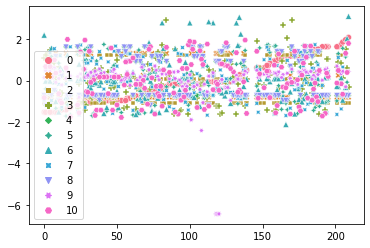

In [985]:
sns.scatterplot(data = x_train)

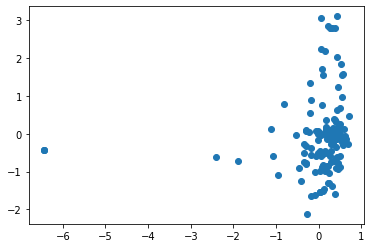

In [994]:
plt.scatter(x=x_train[9],y=x_train[6])

In [957]:
from sklearn.metrics import silhouette_score

silhouette_score(x_train, model.labels_, metric='euclidean')

0.2281330357798311

array([2, 0, 1, 2, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2,
       1, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0,
       2, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0,
       2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 1, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 2, 0, 2, 1])

## finding optimal K

In [995]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++",random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [996]:
wcss

[3569.9999999999995,
 2736.000956480885,
 2395.4316754027673,
 2187.4005867627193,
 2049.0968077512885,
 1916.9909073716785,
 1777.7245072895141,
 1713.864967637804,
 1643.5705806641856,
 1581.4421554783885]

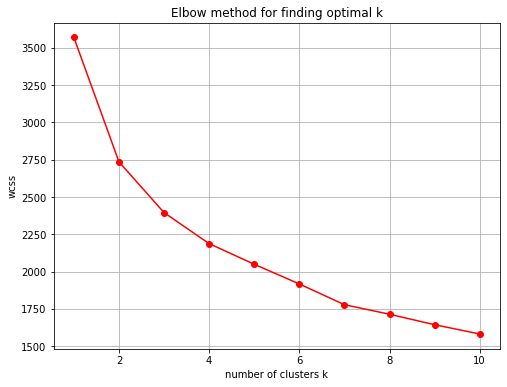

In [1031]:
#plot the elbow curve
plt.figure(figsize=(8,6))
plt.plot(range(1,11),wcss,marker="o",color="red")
plt.title("Elbow method for finding optimal k")
plt.xlabel("number of clusters k")
plt.ylabel("wcss")
plt.grid()
plt.show()

In [1041]:
kmeans=KMeans(n_clusters=2,init="k-means++",random_state=0)
kmeans.fit(x_train)
y_kmeans=kmeans.fit_predict(x_train)

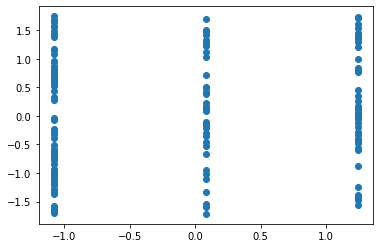

In [1039]:
plt.scatter(x_train.iloc[:,2],x_train.iloc[:,5])

In [1042]:
y_kmeans

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1])

In [1047]:
x_train.values[y_kmeans==0,2]

array([ 1.1806513 , -1.19032877, -0.06129064,  1.51936274,  1.1806513 ,
        1.29355512, -0.17419445, -0.17419445, -0.40000208,  0.95484368,
        1.1806513 , -0.62580971,  1.29355512,  1.29355512, -0.06129064,
       -0.17419445, -0.96452115, -0.40000208, -0.73871352, -0.51290589,
       -1.07742496, -1.07742496, -0.96452115, -0.85161733,  1.40645893,
        1.63226656,  1.29355512, -0.73871352, -0.17419445, -0.06129064,
       -0.17419445, -0.85161733, -1.52904021, -0.06129064, -0.73871352,
       -0.73871352,  1.29355512, -0.06129064, -0.62580971, -0.06129064,
       -0.17419445,  0.39032461, -1.4161364 , -0.40000208, -0.96452115,
        1.1806513 ,  1.40645893, -0.06129064, -0.85161733, -0.28709827,
       -0.06129064,  1.1806513 ,  1.51936274,  1.06774749, -0.06129064,
       -0.96452115])

In [1050]:
x_train.values[y_kmeans==1,2]

array([ 1.24339759, -1.07761124,  1.24339759, -1.07761124,  1.24339759,
       -1.07761124,  1.24339759,  1.24339759, -1.07761124, -1.07761124,
       -1.07761124, -1.07761124, -1.07761124, -1.07761124,  1.24339759,
       -1.07761124, -1.07761124, -1.07761124, -1.07761124, -1.07761124,
        1.24339759, -1.07761124,  1.24339759,  1.24339759,  1.24339759,
        1.24339759,  1.24339759,  1.24339759, -1.07761124,  1.24339759,
       -1.07761124,  1.24339759,  0.08289317,  1.24339759, -1.07761124,
       -1.07761124, -1.07761124, -1.07761124,  1.24339759, -1.07761124,
       -1.07761124,  1.24339759, -1.07761124,  1.24339759, -1.07761124,
       -1.07761124,  1.24339759, -1.07761124,  1.24339759,  1.24339759,
       -1.07761124, -1.07761124, -1.07761124, -1.07761124,  1.24339759,
       -1.07761124, -1.07761124, -1.07761124, -1.07761124,  1.24339759,
       -1.07761124,  1.24339759, -1.07761124, -1.07761124,  1.24339759,
       -1.07761124, -1.07761124, -1.07761124, -1.07761124, -1.07

Text(0.5, 1.0, 'k means clustering')

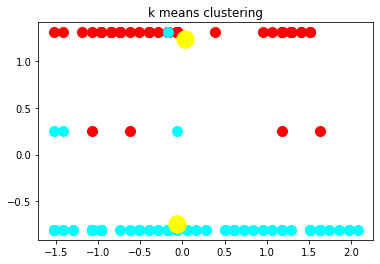

In [1052]:
plt.scatter(x_train.values[y_kmeans==0,0],x_train.values[y_kmeans==0,1],color="red",s=100,label="cluster1")
plt.scatter(x_train.values[y_kmeans==1,0],x_train.values[y_kmeans==1,1],color="cyan",s=100,label="cluster2")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="yellow",s=300,label="centroid")
plt.title("k means clustering")